In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [4]:
chd = df[df.TenYearCHD==1]
chd.shape

(557, 16)

In [5]:
nochd = df[df.TenYearCHD==0]
nochd.shape

(3099, 16)

In [6]:
df.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


<AxesSubplot:xlabel='male'>

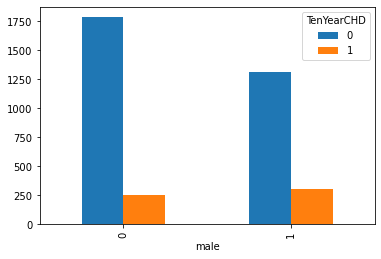

In [7]:
pd.crosstab(df.male,df.TenYearCHD).plot(kind='bar')

<AxesSubplot:xlabel='age'>

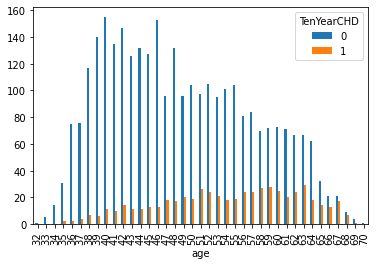

In [8]:
pd.crosstab(df.age,df.TenYearCHD).plot(kind='bar')

<AxesSubplot:xlabel='currentSmoker'>

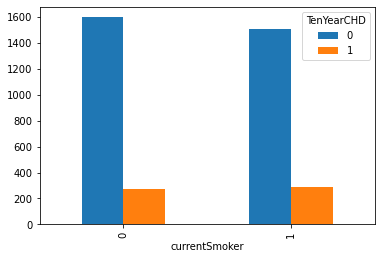

In [9]:
pd.crosstab(df.currentSmoker,df.TenYearCHD).plot(kind='bar')

<AxesSubplot:xlabel='prevalentHyp'>

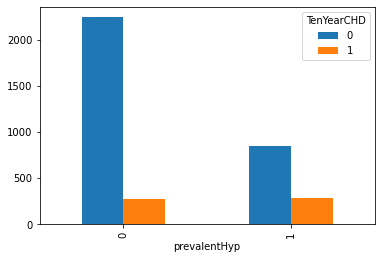

In [10]:
pd.crosstab(df.prevalentHyp,df.TenYearCHD).plot(kind='bar')

In [11]:
X = df[['male', 'age', 'education', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'glucose']]

In [12]:
y = df.TenYearCHD

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
model.score(X_test,y_test)

0.8477666362807658